<a href="https://colab.research.google.com/github/jackychen08/ML_Homework/blob/master/jacky_spring2023_homework1_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> CSCI 601.471/671 NLP: Self-supervised Models </h1> </center>

<center> <h2> Homework 1: Doing Things with Word Embeddings </h2> </center>

In this homework, we will explore word vectors which are a way of attaching meanings to the words of a language.
Because word embeddings are very computionally expensive to train, most ML practitioners will load a pre-trained set of embeddings. 

**After this assignment you will be able to:**

- Load pre-trained word vectors, and measure similarity using cosine similarity
- Use word embeddings to solve word analogy problems such as Man is to Woman as King is to ______. 
- Visualize word embeddings and find insights in them 


Note on Terminology: The terms "word vectors" and "word embeddings" are often used interchangeably. The term "embedding" refers to the fact that we are encoding aspects of a word's meaning in a lower dimensional space. As Wikipedia states, "conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with a much lower dimension".


# Setup

For this and other assignments, we will be using Google Colab, for both code as well as descriptive questions. Your task is to finish all the questions in the Colab notebook and then upload a PDF version of the notebook, and a viewable link on Gradescope.


#### Google colaboratory

Before getting started, get familiar with google colaboratory:
https://colab.research.google.com/notebooks/welcome.ipynb

This is a neat python environment that works in the cloud and does not require you to
set up anything on your personal machine
(it also has some built-in IDE features that make writing code easier).
Moreover, it allows you to copy any existing collaboratory file, alter it and share
with other people. In this homework, we will ask you to copy current colaboraty,
complete all the tasks and share your colaboratory notebook with us so
that we can grade it. 


### Submission

Before you start working on this homework do the following steps:

1. Press __File > Save a copy in Drive...__ tab. This will allow you to have your own copy and change it.
2. Follow all the steps in this collaboratory file and write / change / uncomment code as necessary.
3. Do not forget to occasionally press __File > Save__ tab to save your progress.
4. After all the changes are done and progress is saved press __Share__ button (top right corner of the page), press __get shareable link__ and make sure you have the option __Anyone with the link can view__ selected. Copy the link and paste it in the box below.
5. After completing the notebook, press __File > Download .ipynb__ to download a local copy on your computer, and then upload the file to Gradescope.


__Paste your notebook link in the box below.__ _(0 points)_

In [ ]:
# Paste your Colab notebook link here 



Let's get started! Run the following cell to load the packages you will need.

In [ ]:
!pip install gensim # we will use the GenSim library for loading pre-computed word embedding 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim.downloader

# gensim.downloader.info()

# download the pre-computed embeddings 
# embeddings = gensim.downloader.load('glove-twitter-50')
embeddings = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


From the lecture you might remember that one-hot vectors do not do a good job capturing what words are similar. Let's see how learned word embeddings capture the meaning of individual words. 

To do so, we will start by using the word embeddings to find most similar words to a given words. 

In [ ]:
# Now let's see see what GenSim's API thinks are the most similar words to 'cat'
embeddings.most_similar("cat")

NameError: ignored

Interesting! We can see that most similar words to `cat` are animal names, even though the algorthm is not explicitly taught about the relationship `cat` or `dog`. This is the power of self-supervised learning! 


How does this `most_similar()` function works? Next we will implement our own similarity function! 

# 1 - Cosine similarity

To measure how similar two words are, we need a way to measure the degree of similarity between two embedding vectors for the two words. Given two vectors $u$ and $v$, cosine similarity is defined as follows: 

$$\text{CosineSimilarity(u, v)} = \frac {u . v} {||u||_2 ||v||_2} = cos(\theta) \tag{1}$$

where $u.v$ is the dot product (or inner product) of two vectors, $||u||_2$ is the norm (or length) of the vector $u$, and $\theta$ is the angle between $u$ and $v$. This similarity depends on the angle between $u$ and $v$. If $u$ and $v$ are very similar, their cosine similarity will be close to 1; if they are dissimilar, the cosine similarity will take a smaller value. 


<img src="https://drive.google.com/uc?id=1kEvPpN0awli15o_9h43iKd-J_GwsFqkf" style="width:800px;height:250px;">
<caption><center> **Figure 1**: The cosine of the angle between two vectors is a measure of how similar they are</center></caption>

**Reminder**: The norm of $u$ is defined as $ ||u||_2 = \sqrt{\sum_{i=1}^{n} u_i^2}$




## **Question 1:** Implementing similarity functions 
Implement the function `cosine_similarity()` to evaluate similarity between word vectors.


**Note** It might be useful to use the `NumpPy` library for the following problems. If you're not familiar with this library, [this set of examples](https://cs231n.github.io/python-numpy-tutorial/) might be helpful. 


 ### <font color="red">Write your answer below.</font>

In [ ]:
import numpy as np 

# GRADED FUNCTION: cosine_similarity
# In doing so, please use numpy function 
# TODO: are u, v numpy vectors 

def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similariy between u and v
        
    Arguments:
        u -- a word vector of shape (n,)          
        v -- a word vector of shape (n,)

    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    
    ### START CODE HERE ###
    ### END CODE HERE ###
    
    return cosine_similarity

In [ ]:
father = embeddings["father"]
mother = embeddings["mother"]
ball = embeddings["ball"]
crocodile = embeddings["crocodile"]
france = embeddings["france"]
italy = embeddings["italy"]
paris = embeddings["paris"]
rome = embeddings["rome"]

print("cosine_similarity(father, mother) = ", cosine_similarity(father, mother))
print("cosine_similarity(ball, crocodile) = ",cosine_similarity(ball, crocodile))
print("cosine_similarity(france - paris, rome - italy) = ",cosine_similarity(france - paris, rome - italy))

**Expected Output**:

<table>
    <tr>
        <td>
            **cosine_similarity(father, mother)** =
        </td>
        <td>
         0.79014826
        </td>
    </tr>
        <tr>
        <td>
            **cosine_similarity(ball, crocodile)** =
        </td>
        <td>
         0.10283584
        </td>
    </tr>
        <tr>
        <td>
            **cosine_similarity(france - paris, rome - italy)** =
        </td>
        <td>
         -0.19887
        </td>
    </tr>
</table>

# 2 - Nearest Words 
Now that we have our similarity function implemented, next we will implement a function for measuring nearest words. 


## **Question 2:** Implementing nearest neighbor functions 
Complete the following function `my_most_similar` so that it computes the nearest neighbor words. 

In [ ]:
# a function that resturns the top `k` most similar words to `input_word` 
def my_most_similar(input_word, k): 
  words = embeddings.vocab.keys() # list of words covered by this word embedding 
  input_word_emd = embeddings[input_word]

  ### START CODE HERE ###
  ### END CODE HERE ###

  return top_k_most_similar_words


my_most_similar('cat', 10)

To verify your work, make sure that the outcome of your implementation matches the output you got a few steps earlier when you ran `embeddings.most_similar(.)` function. 

## 3 - Word analogy task

In the word analogy task, we complete the sentence <font color='brown'>"*a* is to *b* as *c* is to **____**"</font>. An example is <font color='brown'> '*man* is to *woman* as *king* is to *queen*' </font>. In detail, we are trying to find a word *d*, such that the associated word vectors $e_a, e_b, e_c, e_d$ are related in the following manner: $e_b - e_a \approx e_d - e_c$. We will measure the similarity between $e_b - e_a$ and $e_d - e_c$ using cosine similarity. 

## **Question 3:** Analogies 
Complete the code below to be able to perform word analogies. 



In [ ]:

def complete_analogy(word_a, word_b, word_c):
    """
    Performs the word analogy task as explained above: a is to b as c is to ____. 
    
    Arguments:
    word_a -- a word, string
    word_b -- a word, string
    word_c -- a word, string
    
    Returns:
    best_word --  the word such that v_b - v_a is close to v_best_word - v_c, as measured by cosine similarity
    """
    
    # convert words to lower case
    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()
    
    ### START CODE HERE ###
    ### END CODE HERE ###
    
    words = embeddings.vocab.keys() # list of words covered by this word embedding 
    max_cosine_sim = -100              # Initialize max_cosine_sim to a large negative number
    best_word = None                   # Initialize best_word with None, it will help keep track of the word to output

    # loop over the whole word vector set
    for w in words:        
        # to avoid best_word being one of the input words, pass on them.
        if w in [word_a, word_b, word_c] :
            continue
        
        ### START CODE HERE ###
        ### END CODE HERE ###
        
    return best_word

Run the cell below to test your code, this may take 1-2 minutes.

In [ ]:
triads_to_try = [('man', 'woman', 'boy'), ('small', 'smaller', 'large')]
for triad in triads_to_try:
    print ('{} -> {} :: {} -> {}'.format( *triad, complete_analogy(*triad)))

**Expected Output**:

<table>
    <!-- <tr>
        <td>
            **italy -> italian** ::
        </td>
        <td>
         spain -> spanish
        </td>
    </tr>
        <tr>
        <td>
            **india -> delhi** ::
        </td>
        <td>
         japan -> tokyo
        </td>
    </tr> -->
        <tr>
        <td>
            **man -> woman ** ::
        </td>
        <td>
         boy -> girl
        </td>
    </tr>
        <tr>
        <td>
            **small -> smaller ** ::
        </td>
        <td>
         large -> larger
        </td>
    </tr>
</table>

Once you get the correct expected output, please feel free to modify the input cells above to test your own analogies. Try to find some other analogy pairs that do work, but also find some where the algorithm doesn't give the right answer: For example, you can try small->smaller as big->?.  

# 4 - Visualizing Word Embeddings 

To inspect the meanings behind these vectors we will plot them. Given that the embeddings are in 300 dimensional space, it is not possible to visualizing them immediately. Instead, we will first project them into a 2D space. 


## 4.1 Random projection into low-dimensional space 
How do we project high-dimensional vectors into lower-dimensional space? Here we will consider a simple solution: 
 - Pick a random matrix (here, a random Gaussian matrix)
 - Multiply each word embedding by this random matrix so that the resulting vector has a much lower dimension.  

The following function is supposed to implement this idea. 

## **Question 4:** projecting down the world embeddings 
Complete the code below to be able to project word embeddings into lower dimension.  

In [ ]:
def random_gaussian_projection(words, target_dimension, input_dimension):

    random_seed = 42 # the answer to the ultimate question of life, the universe, and everything
    rng = np.random.RandomState(random_seed) 
    
    # Generate a dense Gaussian random matrix. The components of the random matrix are drawn from N(0, 1.0 / target_dimension).
    projection_matrix = rng.normal(
        loc=0.0, scale=1.0 / np.sqrt(target_dimension), size=(target_dimension, input_dimension)
    )

    ### START CODE HERE ###
    ### END CODE HERE ###

    return projected_word_embeddings

Now let's apply this function on a bunch of random words: 

In [ ]:
words = ['cat', 'grain', 'wheat', 'cow', 'cheetah', 'crow',  'corn', 'maize', 'dog', 'camel', 'rice', 'barley', 'grains', 'tiger', 'elephant', 'lion', 'turtle', 'rabbit', 'quinoa']

projected_word_embeddings = random_gaussian_projection(words, target_dimension=2, input_dimension=300)

projected_word_embeddings.shape

(19, 2)

As you can see, the result is a collection of vectors with two dimensions. 

Now let's write a function to plot a set of 2D vectors in 2D space. For graphs, we will use `Matplotlib` (plt). A good way to make a plot is to look at the [Matplotlib gallery](https://matplotlib.org/stable/gallery/index.html), find a plot that looks somewhat like what you want, and adapt the code they give.

In [ ]:
!pip install mpld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 5.1 MB/s 


In [ ]:
import matplotlib.pyplot as plt

# mpld3 library will make our plots more beautiful and easier to inspect  
%matplotlib inline
import mpld3
mpld3.enable_notebook()

def plot_embeddings(input_embeddings, word2Ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2Ind.
        Include a label next to each point.
        
        Params:
            input_embeddings (numpy matrix of shape (number of unique words in the corpus , k)): matrix of k-dimensioal word embeddings
            word2Ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """

    words_index = [word2Ind[word] for word in words]
    print(words_index)
    x_coords = [input_embeddings[word_index][0] for word_index in words_index]
    y_coords = [input_embeddings[word_index][1] for word_index in words_index]
    
    for i, word in enumerate(words):
        x = x_coords[i]
        y = y_coords[i]
        plt.scatter(x, y, marker = 'x', color = 'red')
        plt.text(x + 0.0003, y + 0.0003, word, fontsize = 9)
    plt.show()


--------------------------------------------------------------------------------
Outputted Plot:
[0, 1, 2, 3, 4]


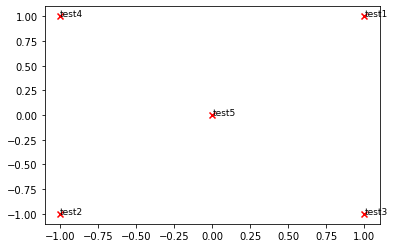

--------------------------------------------------------------------------------


In [ ]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# The plot produced should look like the "test solution plot" depicted below. 
# ---------------------

print ("-" * 80)
print ("Outputted Plot:")

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words_test = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words_test)

print ("-" * 80)

Now let's visualize our projected word vectors with the visualization function that we just wrote. 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


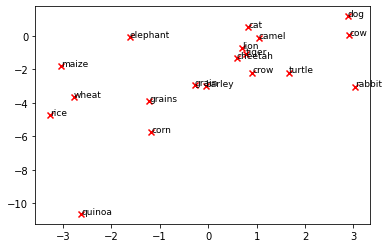

In [ ]:
word2Ind = { w: idx for idx, w in enumerate(words) }
plot_embeddings(projected_word_embeddings, word2Ind, words)

Nice! What do you think? Are you able to see any particular pattern in the visualization of the word vectors? 


## **Question 5:** interpreting the result of the visualizaton  
In one or two sentences, explain how you interpret the results of this visualization. 


**A few additional notes beyond the scope of this class:**
You might wonder why random projection works. The intuition is that random project perseves relative distance between any pair of points (i.e., a pair of points that are closed in high dimension remain close in lower dimension). This idea is formally stated by [Johnson–Lindenstrauss lemma](https://en.wikipedia.org/wiki/Johnson%E2%80%93Lindenstrauss_lemma). One can use fancier algorithmic tools such as PCA, SVD or t-SNE to do this projection which you can check them in your own time. It is worth emphasicizing that none of these random projections are perfect -- projection from high-dimensions is fundamentally a losssy process. 

# 4 - Weaknesses of Word2Vec

One weakness of the original word2vec algorithm was that it has no way of dealing with words that were not in the original training data. Take, for example, the following:

In [ ]:
try:
  embeddings.most_similar('kneee')
except KeyError as e:
  print(e)

"word 'kneee' not in vocabulary"


### Congratulations!

You've come to the end of this assignment. Here are the main points you should remember:

- Cosine similarity a good way to compare similarity between pairs of word vectors. (Though L2 distance works too.) 
- For NLP applications, using a pre-trained set of word vectors from the internet is often a good way to get started. 

Even though you have finished the graded portions, we recommend you take a look too at the rest of this notebook. 

Congratulations on finishing the graded portions of this notebook! 
